In [1]:
import sys
sys.path.append("..")

import Essentials


In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler
import Essentials
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [3]:
a = np.load('C:\\Users\\misha\\PLSSVD\\Data_Average.npz', allow_pickle=True)

In [4]:
x1 = a['X_test_2']
x2 = a['X_train_2']

y1 = a['Y_test_2']
y2 = a['Y_train_2']

In [5]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]
y1 = y1[:, 0].reshape(len(y1), 1).astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1).astype(np.float64)

C:\Users\misha\AppData\Local\Temp\ipykernel_8632\329793319.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = y1[:, 0].reshape(len(y1), 1).astype(np.float64)
C:\Users\misha\AppData\Local\Temp\ipykernel_8632\329793319.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = y2[:, 0].reshape(len(y2), 1).astype(np.float64)


In [6]:
x_test, x_val, y_test, y_val, timestamp_test, timestamp_val = train_test_split(
    x1, y1, timestamp1, test_size=0.5, random_state=42
)

In [7]:

class PLSSVDSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train, x_test, y_test, n_components=2):
        super().__init__(name)  # Правильный вызов базового конструктора
        self.r2_score = None
        self.best_n_components = None
        self.best_model = None
        self.train(x_train, y_train, x_test, y_test, n_components)

    def preprocessing(self, x):
        # Без предобработки
        return x

    def postprocessing(self, y):
        # Без постобработки
        return y

    def evaluate_model(self, x):
        return self.get_model().predict(x)

    def train(self, x_train, y_train, x_test, y_test, n_components=2):
        # Разделение тестовой выборки на две части
        x_test_part, x_val, y_test_part, y_val = train_test_split(
            x_test, y_test, test_size=0.5, random_state=42
        )

        best_score = -np.inf
        for i in range(1, n_components + 1):
            model = PLSRegression(n_components=i, scale=False)
            model.fit(x_train, y_train)
            score = r2_score(y_test_part, model.predict(x_test_part))
            if score > best_score:
                best_score = score
                self.best_n_components = i
                self.best_model = model

        self.set_model(self.best_model)
        self.r2_score = best_score

    def __str__(self):
        model = self.get_model()
        if model is not None:
            coefs_str = ", ".join([f"{coef:.3f}" for coef in model.coef_.ravel()])
            return (f"Модель PLSSVD с {self.best_n_components} компонентами: \n"
                    f"Коэффициенты: {coefs_str} \n"
                    f"R^2 (тестовая выборка): {self.r2_score:.3f}")
        else:
            return "Модель PLSSVD еще не обучена."




In [8]:
Test_sensor_1 = PLSSVDSoftSensor(name='PLS Sensor', x_train=x2, y_train=y2, x_test=x_test, y_test=y_test, n_components=10)

In [9]:
print(Test_sensor_1)

Модель PLSSVD с 5 компонентами: 
Коэффициенты: 0.054, -0.004, -0.033, 0.099, 0.147, -0.008, 0.035, 0.099, 0.001, -0.029, -0.032, -0.002, 0.000, -0.028, 0.002, -0.029, 0.001, 0.085, 0.220, 0.089, 0.267, 0.012, 0.145, -0.125, 0.061, -0.019, 0.001, 0.247, 0.002, 0.014, 0.167, -0.552, -0.003, -0.026, 0.014, -0.043, -0.020, -0.001, 0.061, -0.070, 0.000, 0.018, 0.013, -0.082, 0.000 
R^2 (тестовая выборка): 0.503


In [10]:
metric = Essentials.R2Metric()

In [11]:
test_visual = Essentials.Visualizer(x2, y2, timestamp2, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.518898


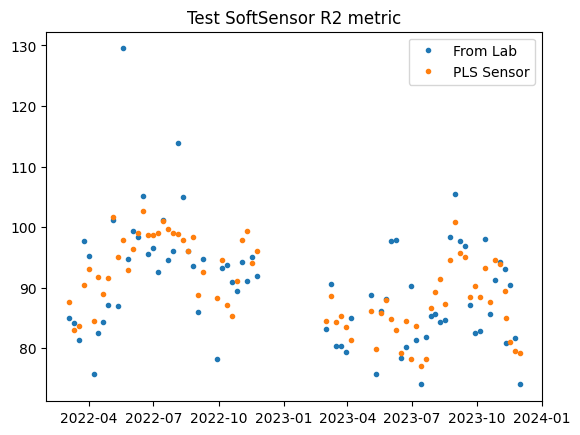

In [12]:
test_visual.visualize([Test_sensor_1])

In [13]:
test_visual_2 = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.183384


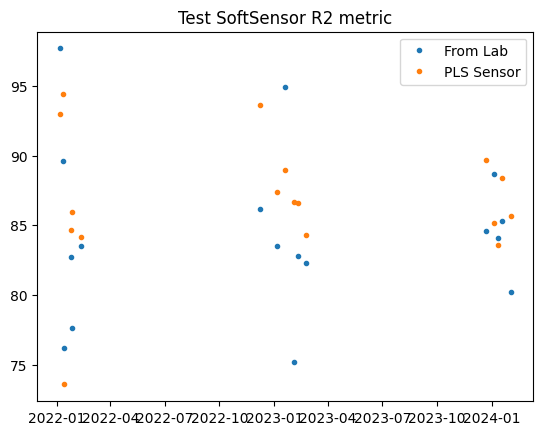

In [14]:
test_visual_2.visualize([Test_sensor_1])

In [15]:
test_visual_3 = Essentials.Visualizer(x_val, y_val, timestamp_val, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.480039


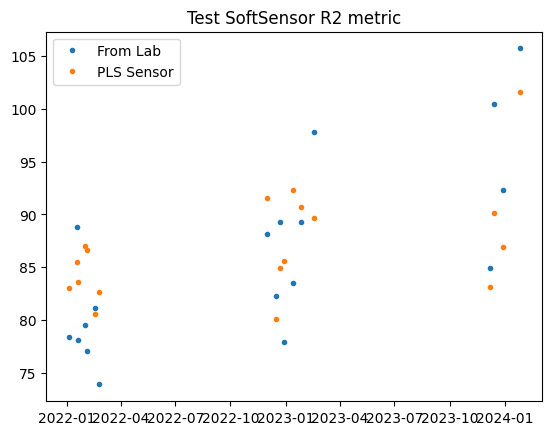

In [16]:
test_visual_3.visualize([Test_sensor_1])